In [1]:
import pickle
import math
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


In [2]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation

    return (1/(1+math.exp(-z)))

In [3]:
def forward_propagation(X, y, w):
        part1=0.0
        part3=0.0
        part2=0.0
        dl=0.0
        loss=0.0
        exp=0.0
        d={}
        if(X.shape[0]==5):
            part1+=np.exp(((w[0]*X[0])+(w[1]*X[1]))**2 + w[5])
            part2+=np.tanh(part1+w[6])
            part3+=sigmoid(np.sin(w[2]*X[2])*((w[3]*X[3])+ (w[4]*X[4])) + w[7])
            y_=part3*w[8]+ part2
            loss=(y-y_)**2
            dl2=-2*(y-y_)
            d['dl']=dl2
            d['loss']=loss
            d['exp']=part1
            d['tanh']=part2
            d['sigmoid']=part3
            return d
 
            
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig variables
        for i in (X):
            part1=np.exp(((w[0]*i[0])+(w[1]*i[1]))**2 + w[5])
            d['exp']=part1

            part2=np.tanh(part1+w[6])
            d['tanh']=part2

            part3=sigmoid(np.sin(w[2]*i[2])*((w[3]*i[3])+ (w[4]*i[4])) + w[7])
            d['sigmoid']=part3

            y_=part3*w[8]+ part2
            loss=(y-y_)**2
            dl2=-2*(y-y_)
            d['dl']=dl2
            d['loss']=loss
           
        return d 
  


In [4]:
def grader_sigmoid(z):
    val=sigmoid(z)
    assert(val==0.8807970779778823)
    return True
grader_sigmoid(2)


True

In [5]:
def grader_forwardprop(data):
    dl = (np.round(data['dl'],4)==-1.9285)
    loss=(np.round(data['loss'],4)==0.9298)
    part1=(np.round(data['exp'],4)==1.1273)
    part2=(np.round(data['tanh'],4)==0.8418)
    part3=(np.round(data['sigmoid'],4)==0.5279)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

In [6]:
def backward_propagation(i,w,d):
    data={}
    dw7=(d['dl'])*(1-np.tanh(d['exp']+w[6])**2)
    dw9=d['dl']*d['sigmoid']
    dw8=d['dl']*w[8]*(1-d['sigmoid'])*d['sigmoid']
    dw6=d['dl']*(1-np.tanh(d['exp']+ w[6])**2)*d['exp']
    dw1=d['dl']*(1-np.tanh(d['exp']+ w[6])**2)*d['exp']*2*((w[0]*i[0])+(w[1]*i[1]))*i[0]
    dw2=dw1*i[1]/i[0]
    dw3=d['dl']*w[8]*d['sigmoid']*(1-d['sigmoid'])*((w[3]*i[3])+(w[4]*i[4]))*i[2]*math.cos(w[2]*i[2])
    dw4=d['dl']*w[8]*d['sigmoid']*(1-d['sigmoid'])*math.sin(w[2]*i[2])*i[3]
    dw5=dw4*i[4]/i[3]
    data['dw1']=dw1
    data['dw2']=dw2
    data['dw3']=dw3
    data['dw4']=dw4
    data['dw5']=dw5
    data['dw6']=dw6
    data['dw7']=dw7
    data['dw8']=dw8
    data['dw9']=dw9
   
    # dictionary: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9
    return data
    # return dW, dW is a dictionary with gradients of all the weights

In [7]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],8)==-0.22973323)
    dw2=(np.round(data['dw2'],8)==-0.02140761)
    dw3=(np.round(data['dw3'],8)==-0.00562541)
    dw4=(np.round(data['dw4'],8)==-0.00465794)
    dw5=(np.round(data['dw5'],8)==-0.00100772)
    dw6=(np.round(data['dw6'],8)==-0.63347519)
    dw7=(np.round(data['dw7'],8)==-0.56194184)
    dw8=(np.round(data['dw8'],8)==-0.04806288)
    dw9=(np.round(data['dw9'],8)==-1.01810444)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
d1=backward_propagation(X[0],w,d1)
grader_backprop(d1)
list(d1.values())[0]

-0.22973323498702

In [8]:
def approx(i,y,w):
    part1=np.exp(((w[0]*i[0])+(w[1]*i[1]))**2 + w[5])

    part2=np.tanh(part1+w[6])

    part3=sigmoid(np.sin(w[2]*i[2])*((w[3]*i[3])+ (w[4]*i[4])) + w[7])

    y_=part3*w[8]+ part2
    return y_
    

In [63]:
w = np.random.normal(0,0.1,size=9)
def gradient_checking(x, w,y):
    grad_check=[]
    d1=forward_propagation(x,y,w)
    dw=backward_propagation(x,w,d1)
    grad=list(dw.values())
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()
    approx_gradients = []
    for i in range(len(w)):
        epsilon=0.0001
        w[i]+=epsilon
        x2=approx(x,y,w)
        d2=forward_propagation(x,y,w)
        w[i]=w[i]-2*epsilon
        x3=approx(x,y,w)
        d3=forward_propagation(x,y,w)
        w[i]+=epsilon
        b3=backward_propagation(x,w,d3)
        b2=list(b3.values())
        dw_1=(d2['loss']-d3['loss'])/(2*epsilon)
        num=np.linalg.norm(b2[i]-dw_1)
        den=np.linalg.norm(b2[i])+np.linalg.norm(dw_1)
        diff=num/den
        if(diff < 1e-4):
            print("gradient is correct :",diff)
        grad_check.append(diff)
        w[i]=w[i]-epsilon
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi
    #for i in range(len(w)):
     #   num=np.linalg.norm(grad[i]-approx_gradients[i])
      #  den=np.linalg.norm(grad[i])+np.linalg.norm(approx_gradients[i])
       # diff=num /den
        ##grad_check.append(diff)
        #if(diff > 1e-3):
         #   print("gradient is incorrect ")
    return grad_check

In [65]:
w = np.random.normal(0,0.1,size=9)
g=gradient_checking(X[0],w,y[0])


gradient is correct : 1.2379988421222557e-05
gradient is correct : 1.1518373790157898e-06
gradient is correct : 1.3852653819396647e-07
gradient is correct : 1.1536344870001203e-07
gradient is correct : 2.2556617699683614e-08
gradient is correct : 5.518861439884728e-05
gradient is correct : 1.717969350254176e-05
gradient is correct : 1.8395974285581807e-06
gradient is correct : 2.2897331840273502e-05


In [11]:
loss=[]
learning_rate=0.0001
for epoch in range(100):
    for i in range(len(X)):
        f1=forward_propagation(X[i],y[i],w)
        dw=backward_propagation(X[i],w,f1)
        w[0]=w[0]-learning_rate*dw['dw1']
        w[1]=w[1]-learning_rate*dw['dw2']
        w[2]=w[2]-learning_rate*dw['dw3']
        w[3]=w[3]-learning_rate*dw['dw4']
        w[4]=w[4]-learning_rate*dw['dw5']
        w[5]=w[5]-learning_rate*dw['dw6']
        w[6]=w[6]-learning_rate*dw['dw7']
        w[7]=w[7]-learning_rate*dw['dw8']
        w[8]=w[8]-learning_rate*dw['dw9']
    loss.append(f1['loss'])

        

Text(0, 0.5, 'loss')

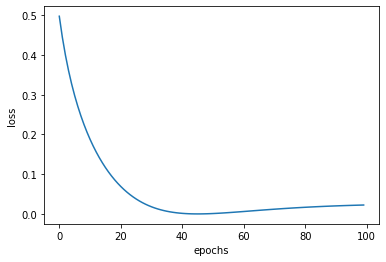

In [12]:
import matplotlib.pyplot as plt
plt.plot(list(range(100)),loss)
plt.xlabel("epochs")
plt.ylabel("loss")

In [43]:
beta=0.9
v=[0]*9
loss_2=[]
learning_rate=0.0001
for epoch in range(100):
    for i in range(len(X)):
        
        f1=forward_propagation(X[i],y[i],w)
        dw=backward_propagation(X[i],w,f1)
        v[0]=beta*v[0]+ (1-beta)*dw['dw1']
        w[0]=w[0]-learning_rate*v[0]
        v[1]=beta*v[1] + (1-beta)*dw['dw2']

        w[1]=w[1]-learning_rate*v[1]
        v[2]=beta*v[2] + (1-beta)*dw['dw3']
        w[2]=w[2]-learning_rate*v[2]
        v[3]=beta*v[3] + (1-beta)*dw['dw4']

        w[3]=w[3]-learning_rate*v[3]
        v[4]=beta*v[4] + (1-beta)*dw['dw5']

        w[4]=w[4]-learning_rate*v[4]
        v[5]=beta*v[5] + (1-beta)*dw['dw6']

        w[5]=w[5]-learning_rate*v[5]
        v[6]=beta*v[6] + (1-beta)*dw['dw7']

        w[6]=w[6]-learning_rate*v[6]
        v[7]=beta*v[7] + (1-beta)*dw['dw8']

        w[7]=w[7]-learning_rate*v[7]
        v[8]=beta*v[8] + (1-beta)*dw['dw9']

        w[8]=w[8]-learning_rate*v[8]
    loss_2.append(f1['loss'])


Text(0, 0.5, 'loss')

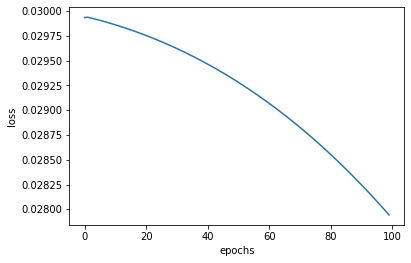

In [44]:
plt.plot(list(range(100)),loss_2)
plt.xlabel("epochs")
plt.ylabel("loss")

In [15]:
mt=np.zeros(9)
vt=np.zeros(9)
beta1=0.9
beta2=0.999
epsilon=np.array([pow(10, -8)])
loss_3=[]
learning_rate=0.0001
for epoch in range(100):
    for i in range(len(X)):
        f1=forward_propagation(X[i],y[i],w)
        dw=backward_propagation(X[i],w,f1)
        dw2=list(dw.values())
        for j in range(len(w)):
            mt[j]=beta1*mt[j] + (1-beta1)*dw2[j]
            vt[j]=beta2*vt[j] + (1-beta2)*(dw2[j])**2
            mt_=mt[j]/(1-pow(beta1,epoch+1))
            vt_=vt[j]/(1-pow(beta1,epoch+1))
            w[j]=w[j]- learning_rate*(mt_/(np.sqrt(vt_)+epsilon))
            
    loss_3.append(f1['loss'])

        

Text(0, 0.5, 'loss')

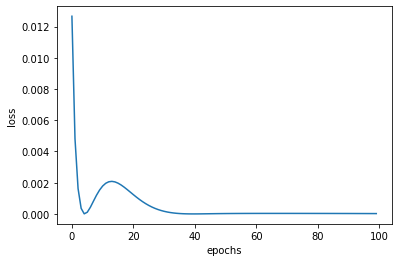

In [16]:
plt.plot(list(range(100)),loss_3)
plt.xlabel("epochs")
plt.ylabel("loss")